In [1]:
import kagglehub

# Download the dataset
path = kagglehub.dataset_download("kylegraupe/wind-turbine-image-dataset-for-computer-vision")

print("Path to dataset files:", path)

Mounting files to /kaggle/input/wind-turbine-image-dataset-for-computer-vision...
Path to dataset files: /kaggle/input/wind-turbine-image-dataset-for-computer-vision


In [4]:
dataset_path = path + "/data.yaml"
# Checking the dataset information
print(open(dataset_path).read())

train: ../train/images
val: ../valid/images
test: ../test/images

nc: 2
names: ['cable tower', 'turbine']

roboflow:
  workspace: kyle-graupe-jobhn
  project: wind-farms
  version: 5
  license: CC BY 4.0
  url: https://universe.roboflow.com/kyle-graupe-jobhn/wind-farms/dataset/5


In [5]:
# Installing Ultralytics library which has Yolo 
!pip install -q ultralytics

In [6]:
from ultralytics import YOLO

# Load YOLOv8 model (small version)
model = YOLO("yolov8s.pt")

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


### predicting an image before training


image 1/1 /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill29_jpg.rf.a21f26892fe281274b8c834ffc3a4c48.jpg: 384x640 1 airplane, 10.9ms
Speed: 2.1ms preprocess, 10.9ms inference, 2.4ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict


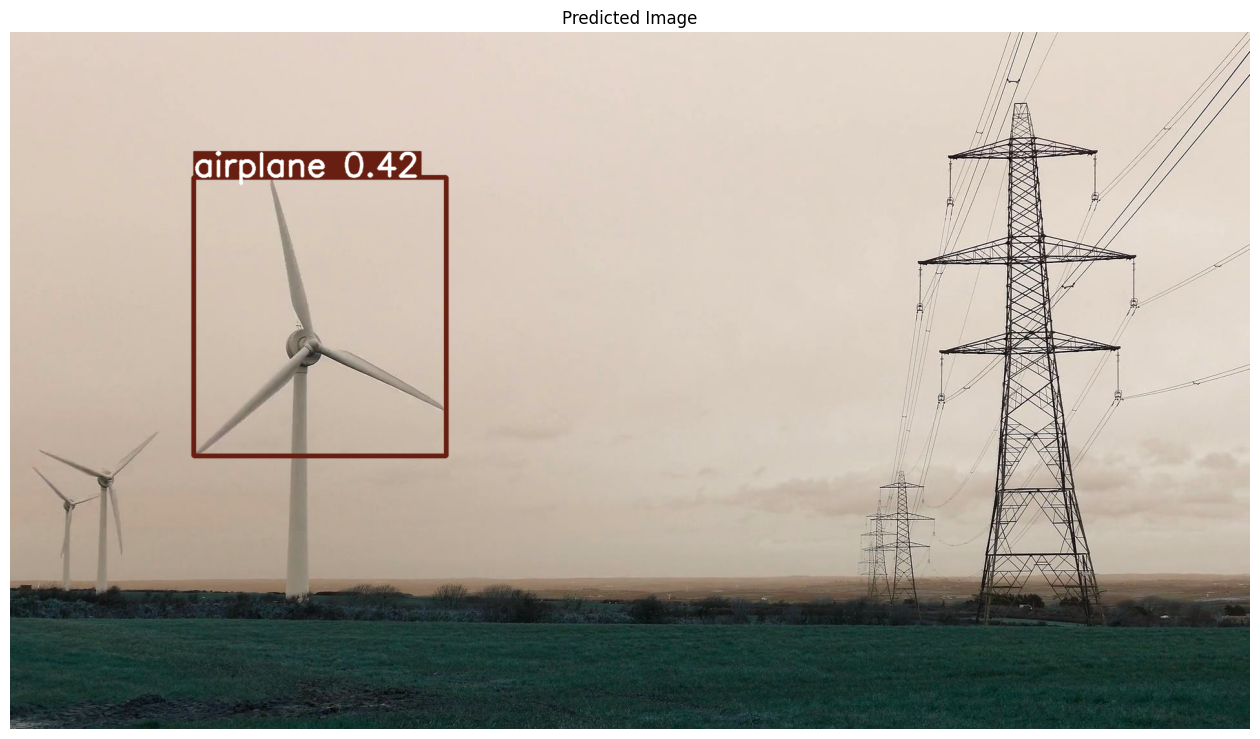

In [18]:
image_path="/kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill29_jpg.rf.a21f26892fe281274b8c834ffc3a4c48.jpg"

import matplotlib.pyplot as plt
results = model(image_path,save=True)
# Convert result to a NumPy array and display
predicted_image = results[0].plot()  
plt.figure(figsize=(16, 16))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image")
plt.show()

## training time

In [19]:
# Train on the wind turbine dataset
model.train(data=dataset_path, epochs=20, imgsz=640)

New https://pypi.org/project/ultralytics/8.3.190 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/wind-turbine-image-dataset-for-computer-vision/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=20, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8s.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=train, nb

/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        247       1562      0.754       0.62      0.751      0.388
           cable tower          7         24      0.694      0.542      0.673      0.256
               turbine        239       1538      0.815      0.698       0.83       0.52
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 3.2ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0, 1])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79ae9e52a2d0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.04804

## Evaluation

In [20]:
# Run validation
metrics = model.val()

Ultralytics 8.3.189 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 11,126,358 parameters, 0 gradients, 28.4 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 252.7±131.8 MB/s, size: 153.2 KB)
val: Scanning /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid/labels... 247 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 247/247 849.2it/s 0.3s
WARNING ⚠️ val: Cache directory /kaggle/input/wind-turbine-image-dataset-for-computer-vision/valid is not writeable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 16/16 4.5it/s 3.6s


/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        247       1562      0.758       0.62      0.749      0.388
           cable tower          7         24      0.696      0.542       0.67      0.257
               turbine        239       1538      0.819      0.698      0.828       0.52
Speed: 0.8ms preprocess, 5.7ms inference, 0.0ms loss, 3.9ms postprocess per image
Results saved to runs/detect/train2


### Saving the best weights after the training is complete

In [25]:
import os
best_weights_path = os.path.join(model.trainer.save_dir, "weights", "best.pt")

# Loading the trained model with the best weights
trained_model = YOLO(best_weights_path)

print("Trained model loaded successfully from:", best_weights_path)

Trained model loaded successfully from: runs/detect/train/weights/best.pt


### I'll predict again for the same image or( you can use any image you want) after the training too see the results and whether it will it get it correct this time


image 1/1 /kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill29_jpg.rf.a21f26892fe281274b8c834ffc3a4c48.jpg: 384x640 3 turbines, 11.4ms
Speed: 1.9ms preprocess, 11.4ms inference, 1.8ms postprocess per image at shape (1, 3, 384, 640)
Results saved to runs/detect/predict2


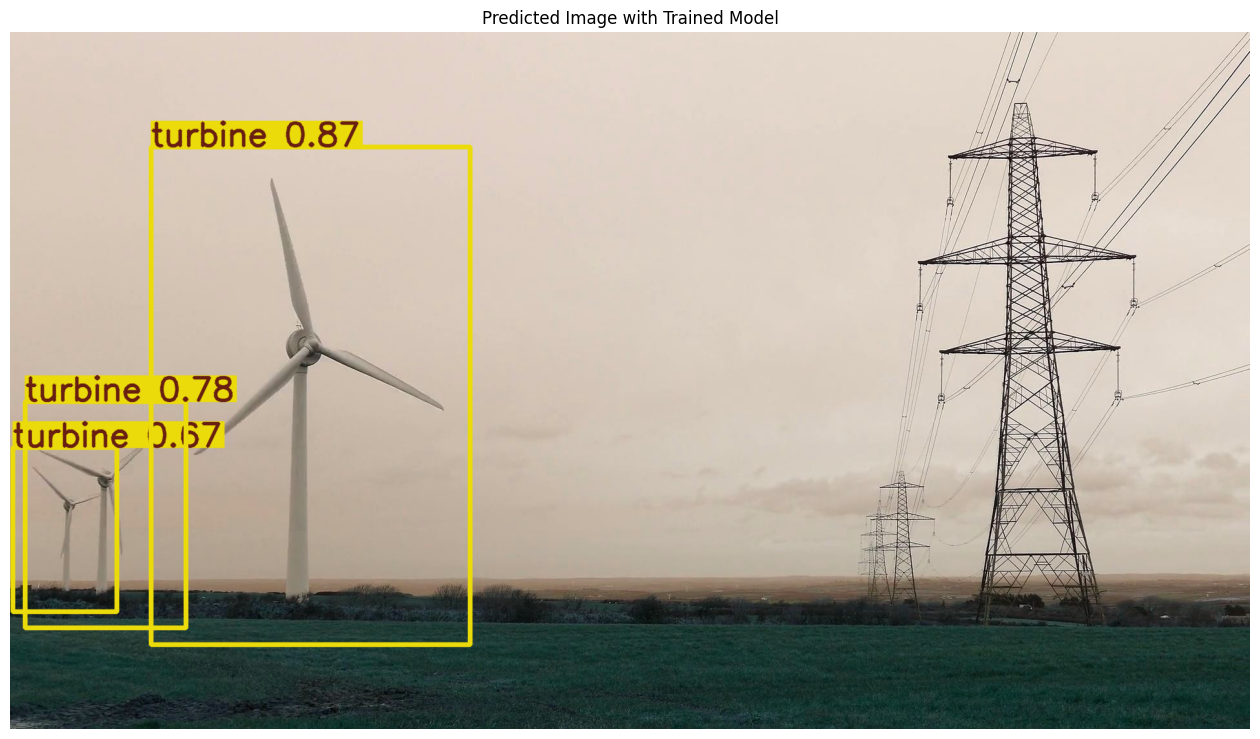

In [26]:
image_path="/kaggle/input/wind-turbine-image-dataset-for-computer-vision/test/images/windmill29_jpg.rf.a21f26892fe281274b8c834ffc3a4c48.jpg"
results = trained_model(image_path,save=True)
# Convert result to a NumPy array and display
predicted_image = results[0].plot()  
plt.figure(figsize=(16, 16))
plt.imshow(predicted_image)
plt.axis("off")
plt.title("Predicted Image with Trained Model")
plt.show()

# ** 🔥🚀☆*: .｡. o(≧▽≦)o .｡.:*☆**